In [61]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('./janken/img/gu.png')
# save で拡張子変更して保存できる 

In [50]:
gu_array = np.array(img)
gu_array

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [33]:
gu_array.shape

(220, 220, 4)

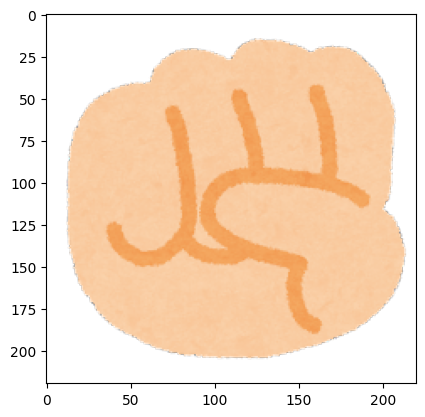

In [34]:
plt.imshow(img)

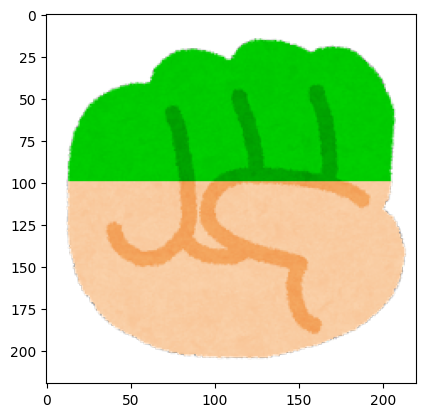

In [35]:
green_gu = gu_array.copy()
green_gu[0:100,:,0] = 0 #赤を0
green_gu[0:100,:,2] = 0 #青を0
plt.imshow(green_gu)

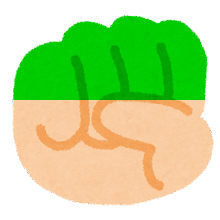

In [36]:
img2 = Image.fromarray(green_gu)
img2

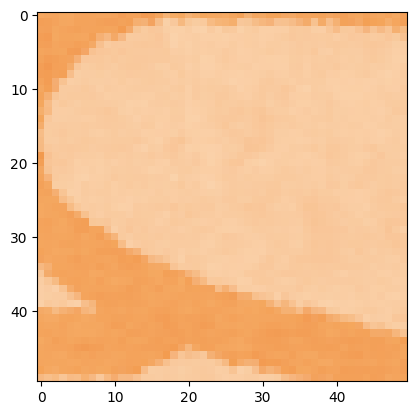

In [37]:
trimmed = green_gu[100:150, 100:150]#トリミング。 crop()　でも同じことができる
plt.imshow(trimmed)

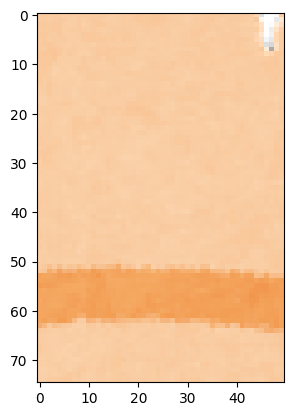

In [44]:
pa_img = Image.open('janken/img/pa.png')#トリミング
iwidth, iheight = pa_img.size
cwidth, cheight = 50, 75
pa_crop = pa_img.crop(((iwidth - cwidth)//2,
                     (iheight - cheight)//2,
                     (iwidth + cwidth)//2,
                     (iheight + cheight)//2))
plt.imshow(pa_crop)

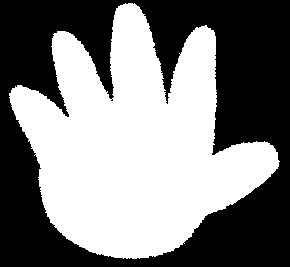

In [39]:
pa_g = pa_img.convert('L')
pa_g.point(lambda x :0 if x < 128 else 255)

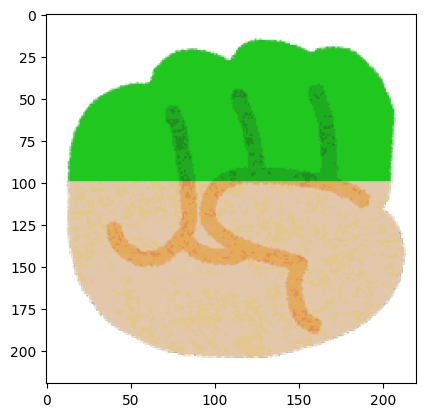

In [40]:
pa_ = green_gu // 32 *32
plt.imshow(pa_)

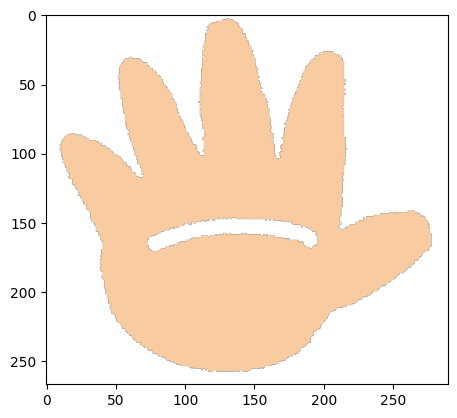

In [41]:
green_q = pa_img.quantize(2)
plt.imshow(green_q)

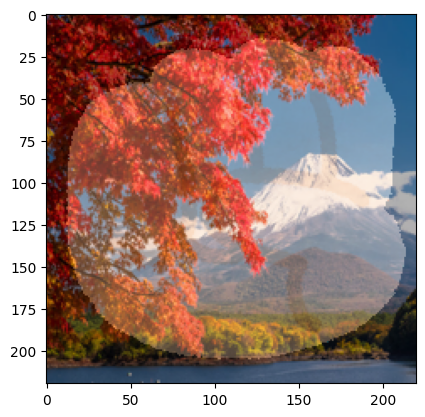

In [58]:
fall = Image.open('pil/large.jpg')
fall = fall.convert("RGB")
img = img.convert("RGB")
result = Image.blend(img, fall.resize(img.size),alpha=0.7)
plt.imshow(result)

#np arrayだとこう書ける
# blend = np.array(fall) * 0.5 + np.array(fall.resize(img.size)) * 0.5
# plt.imshow(np.uint8(blend))

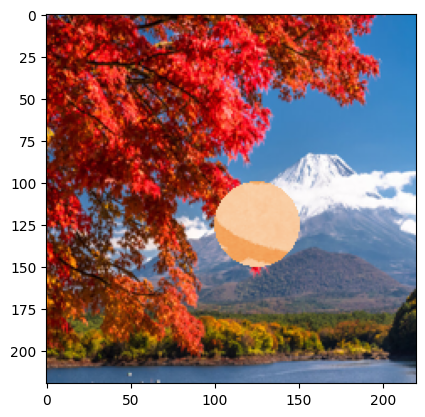

In [62]:
back = fall = Image.open('pil/large.jpg').resize(img.size)# くり抜きマスキング
mask = Image.new("L", img.size, 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((100,100,150,150),fill=255)
result = Image.composite(img, back, mask)
plt.imshow(result)

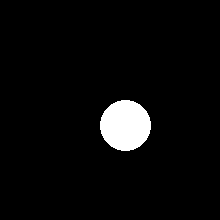

In [63]:
mask